# excercise 2: PCA + Multinomial Logistic Regression

## Importing the libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import mutual_info_score

## Importing the dataset

In [28]:

#Load data and assign a name to features
features = ["F"+str(x) for x in range(1,11,1)]
dataset: pd.DataFrame = pd.read_csv("data_kPCA.txt", sep = " ", 
                                header = None, 
                                names  = features, 
                                index_col = False)

labels: pd.DataFrame = pd.read_csv("labels_kPCA.txt",  
                                header = None, 
                                names  = ["labels"], 
                                index_col = False)
dataset["labels"] = labels["labels"]

X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Kernel PCA

In [31]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)


## Logistic Regression

### [PC1,PC2] Training the Logistic Regression model on the Training set

In [32]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### [PC1,PC2] Predicting the Test set results

In [33]:
#prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 1]
 [2 2]]


### [PC1,PC2] Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf_matrix = confusion_matrix(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

Accuracy score: 0.9


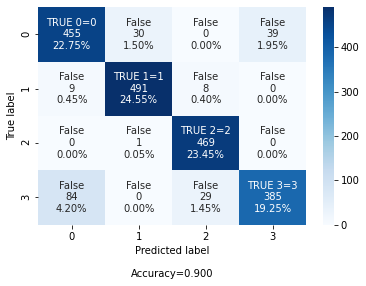

In [35]:
#display matrix
group_names = ["TRUE 0=0","False","False","False", 
          "False","TRUE 1=1","False","False", 
          "False","False","TRUE 2=2","False", 
          "False","False","False","TRUE 3=3"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(4,4)

#if it is a binary confusion matrix, show some more stats
if len(cf_matrix)==2:
    #Metrics for Binary Confusion Matrices
    precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
    recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
else:
    stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues' )
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)
plt.show()
    
#TODO improve as per 
# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
# https://github.com/DTrimarchi10/confusion_matrix

# For an increasing number of PCs ...

In [36]:
accuracy_list=[]
mutual_info_list=[]

for pc in range(1,11,1):
    
    print('applying Kernel PCA to ', pc)
    kpca = KernelPCA(n_components = pc, kernel = 'rbf')
    X_train_pc = kpca.fit_transform(X_train)
    X_test_pc = kpca.transform(X_test)
    
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train_pc, y_train)
    y_pred = classifier.predict(X_test_pc)
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    
    mi=mutual_info_score(y_test, y_pred)
    
    mutual_info_list.append(mi)
    print(f'PC 1 to PC{pc}     Accuracy score: {accuracy}   Mutual Information: {mi}')
    
   

applying Kernel PCA to  1
PC 1 to PC1     Accuracy score: 0.671   Mutual Information: 0.6775907332596794
applying Kernel PCA to  2
PC 1 to PC2     Accuracy score: 0.895   Mutual Information: 1.0308564537586324
applying Kernel PCA to  3
PC 1 to PC3     Accuracy score: 0.9   Mutual Information: 1.0425127813168085
applying Kernel PCA to  4
PC 1 to PC4     Accuracy score: 0.903   Mutual Information: 1.0519355073614731
applying Kernel PCA to  5
PC 1 to PC5     Accuracy score: 0.9055   Mutual Information: 1.0576509364777538
applying Kernel PCA to  6
PC 1 to PC6     Accuracy score: 0.906   Mutual Information: 1.059702681753325
applying Kernel PCA to  7
PC 1 to PC7     Accuracy score: 0.906   Mutual Information: 1.059702681753325
applying Kernel PCA to  8
PC 1 to PC8     Accuracy score: 0.906   Mutual Information: 1.059702681753325
applying Kernel PCA to  9
PC 1 to PC9     Accuracy score: 0.9065   Mutual Information: 1.0607723975414087
applying Kernel PCA to  10
PC 1 to PC10     Accuracy score

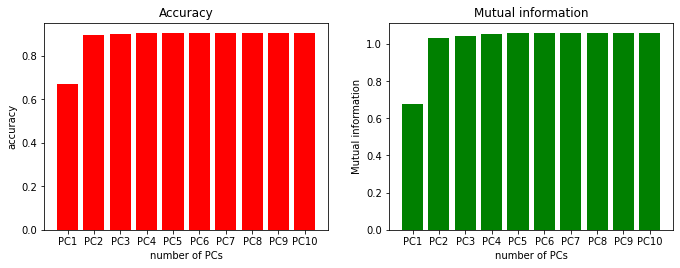

In [37]:
pcs = ['PC'+str(nnn+1) for nnn in range(10)]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.tight_layout(pad=3)

ax[0].bar(pcs, accuracy_list,    color='r')
ax[0].set_ylim(bottom=0)
ax[0].set(title='Accuracy', ylabel='accuracy', xlabel='number of PCs')

ax[1].bar(pcs,mutual_info_list,  color='g')
ax[1].set_ylim(bottom=0)
ax[1].set(title='Mutual information', ylabel='Mutual information', xlabel='number of PCs')

plt.show()

In [50]:
df = pd.DataFrame(pcs, columns=['PCs'])
df['KPCA_accuracy'] = accuracy_list
df['KPCA_mutual_info']= mutual_info_list
df.to_csv('metrics_KernelPCA.csv', index=False)


# compare with PCA


In [62]:
metrics_pca = pd.read_csv('metrics_PCA.csv')
metrics_kpca = pd.read_csv('metrics_KernelPCA.csv')
metrics = metrics_pca.merge(metrics_kpca, on='PCs')
metrics



,PCs,PCA_accuracy,PCA_mutual_info,KPCA_accuracy,KPCA_mutual_info
0,PC1,0.6115,0.468217,0.6710,0.677591
1,PC2,0.6395,0.517344,0.8950,1.030856
2,PC3,0.8470,1.002142,0.9000,1.042513
3,PC4,0.9310,1.151288,0.9030,1.051936
4,PC5,0.9430,1.180709,0.9055,1.057651
5,PC6,0.9530,1.210848,0.9060,1.059703
6,PC7,0.9550,1.216061,0.9060,1.059703
7,PC8,0.9695,1.252961,0.9060,1.059703
8,PC9,0.9700,1.255803,0.9065,1.060772
9,PC10,0.9765,1.276425,0.9065,1.060772


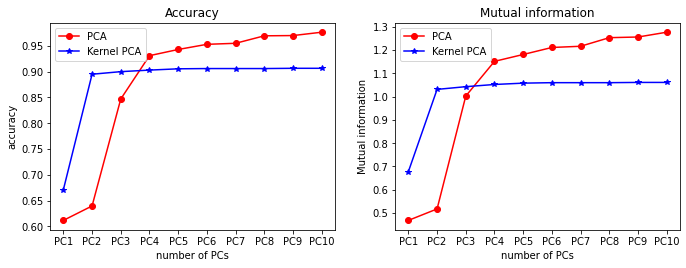

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.tight_layout(pad=3)

ax[0].plot(pcs, metrics.PCA_accuracy.values,  color='r', marker='o')
ax[0].plot(pcs, metrics.KPCA_accuracy,    color='b', marker='*')
ax[0].set(title='Accuracy', ylabel='accuracy', xlabel='number of PCs')
ax[0].legend(['PCA', 'Kernel PCA'])

ax[1].plot(pcs, metrics.PCA_mutual_info.values,  color='r', marker='o')
ax[1].plot(pcs, metrics.KPCA_mutual_info,    color='b', marker='*')
ax[1].set(title='Mutual information', ylabel='Mutual information', xlabel='number of PCs')
ax[1].legend(['PCA', 'Kernel PCA'])
plt.show()